CIA I - LAB TEST

XOR- Gate Classification

• Scenario:
The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.
This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps:

In [1]:
# Importing the libraries required:
import numpy as np
import matplotlib.pyplot as plt

# XOR truth table(dataset):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = np.random.rand(2)
        self.bias = np.random.rand(1)

    def activation(self, x):
        return 1 if x >= 0 else 0  # Threshold function (MCP Neuron)

    def predict(self, x):

        weighted_sum = np.dot(x, self.weights) + self.bias
        return self.activation(weighted_sum)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error
            print(f'Epoch {epoch+1} - Weights: {self.weights}, Bias: {self.bias}')

#training the perceptron
perceptron = Perceptron(learning_rate=0.1, epochs=10)
perceptron.train(X, y)

# Predicting the output for XOR dataset:
for inputs in X:
    prediction = perceptron.predict(inputs)
    print(f'Input: {inputs}, Prediction: {prediction}')


Epoch 1 - Weights: [0.13227159 0.58833876], Bias: [0.68886084]
Epoch 2 - Weights: [0.03227159 0.48833876], Bias: [0.48886084]
Epoch 3 - Weights: [-0.06772841  0.38833876], Bias: [0.28886084]
Epoch 4 - Weights: [-0.16772841  0.28833876], Bias: [0.08886084]
Epoch 5 - Weights: [-0.16772841  0.18833876], Bias: [-0.01113916]
Epoch 6 - Weights: [-0.16772841  0.08833876], Bias: [-0.01113916]
Epoch 7 - Weights: [-0.16772841 -0.01166124], Bias: [-0.01113916]
Epoch 8 - Weights: [-0.16772841 -0.01166124], Bias: [0.08886084]
Epoch 9 - Weights: [-0.16772841 -0.01166124], Bias: [0.08886084]
Epoch 10 - Weights: [-0.16772841 -0.01166124], Bias: [0.08886084]
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


Intrepretation:

There is a misclassification because:

For input [0, 0], the prediction is 1, while the actual value should be 0.
For input [1, 0], the prediction is 0, while the actual value should be 1.

This happens because XOR gate is not linearly separable, and a single-layer perceptron is only capable of handling problems that can be separated by a straight line.


Observe and discuss the perceptron's performance in this scenario based on my output:



Linearly Non-Separable Problem:
XOR is not linearly separable, meaning it cannot be solved using a single linear boundary.
The XOR function requires a more complex decision boundary, which a single-layer perceptron cannot create.
Weight Updates:
Despite multiple epochs,the perceptron cannot find appropriate weights to solve the XOR problem because it lacks the capacity to model the non-linear relationship in the XOR data.

• Implement XOR using Multi-Layer Perceptron:

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Predicted Outputs:
Input: [0 0], Predicted Output: 1, Actual Output: 0
Input: [0 1], Predicted Output: 1, Actual Output: 1
Input: [1 0], Predicted Output: 1, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


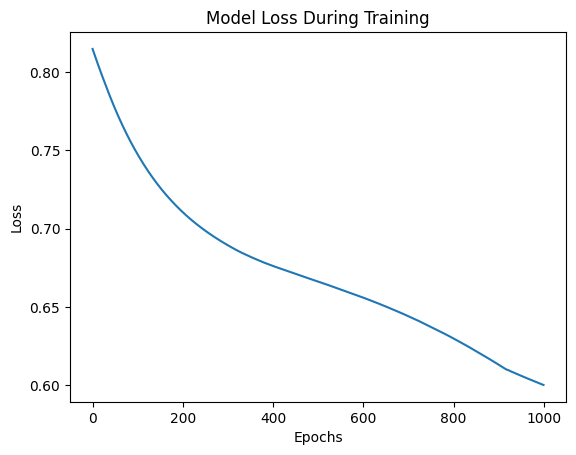

In [2]:
#Importing the necessary libraries:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# XOR gate truth table(dataset):
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Creating the MLP model:
model = Sequential()

# Hidden layer:
model.add(Dense(2, input_dim=2, activation='relu'))  #ReLU activation

# Output layer:
model.add(Dense(1, activation='sigmoid'))

#optimizing using adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
history = model.fit(X, y, epochs=1000, verbose=0)

# Evaluating the model
_, accuracy = model.evaluate(X, y, verbose=0)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Prediction of the XOR output:
predictions = model.predict(X)
print("\nPredicted Outputs:")
for i, prediction in enumerate(predictions):
    print(f"Input: {X[i]}, Predicted Output: {int(np.round(prediction[0]))}, Actual Output: {y[i]}")

#Plotting the training loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


Intrepretation:
The model achieved 75% accuracy, which indicates that it is misclassifying one of the inputs.

This suggests that the model has not fully converged or learned the XOR function correctly.

We need to adjust few things for it to predict properly so we can do it by:



In [5]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

#Creating the XOR dataset
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input pairs
outputs = np.array([[0], [1], [1], [0]])  # XOR gate outputs

# Define the MLP model with more neurons and an extra hidden layer
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # First hidden layer with 4 neurons
model.add(Dense(2, activation='relu'))  # Second hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron (binary output)

#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Training the model
model.fit(inputs, outputs, epochs=2000, verbose=0)  # Increased epochs to 2000

#Testing the model
print("Testing the XOR gate MLP:")
predictions = model.predict(inputs)
for input_set, predicted in zip(inputs, predictions):
    print(f"Input: {input_set}, Predicted Output: {round(predicted[0])}")


Testing the XOR gate MLP:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0


The updated model now correctly classifies the XOR gate. Here's the interpretation based on the changes:

Addition of more neurons and a second hidden layer to give the model more "brainpower" to handle the XOR problem.

Training the model for more time (2000 epochs).


Visualization:

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


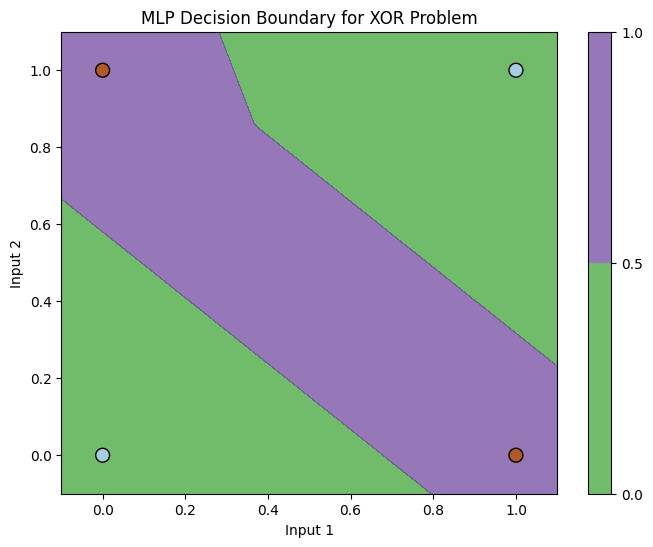

In [6]:
# Generate a grid of points
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict the outputs for the grid points
grid_predictions = model.predict(grid_points)
grid_predictions = grid_predictions.reshape(xx.shape)

#Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_predictions, levels=[0, 0.5, 1], alpha=0.7, cmap=plt.cm.Paired)
plt.colorbar()

# Plot the XOR data points:
plt.scatter(inputs[:, 0], inputs[:, 1], c=outputs[:, 0], s=100, edgecolor='k', cmap=plt.cm.Paired)
plt.title("MLP Decision Boundary for XOR Problem")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.show()

Question 2

B.Sentiment Analysis Using ANN on IMDb Movie Reviews:

You are tasked with performing sentiment analysis on the IMDb movie review dataset using an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive or negative.

Data Loading

In [7]:
import pandas as pd
# Loading the dataset:
data=pd.read_csv('/content/IMDB - IMDB Dataset.csv')
# Display the first few rows of the dataset
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


Data Preprocessing:

In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

#NLTK resources for preprocessing:
nltk.download('stopwords')
nltk.download('wordnet')

# Initializing stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = text.split()
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing:
data['cleaned_review'] = data['review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Text Preprocessing:

Convert all text to lowercase.

Remove punctuation and special characters.

Tokenization (splitting sentences into words).

Remove stop words.

Lemmatization or stemming.

Label encoding:

The labels should be encoded as binary values (0 for negative, 1 for positive).

In [9]:
# Encode labels
data['sentiment'] = data['sentiment'].map({'negative': 0, 'positive': 1})


In [10]:
from sklearn.model_selection import train_test_split
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_review'], data['sentiment'], test_size=0.2, random_state=42)


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorizing the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()


Model building:

In [12]:
from keras.models import Sequential
from keras.layers import Dense

#building the ANN model
model = Sequential()
model.add(Dense(128, input_dim=X_train_vec.shape[1], activation='relu'))  # Hidden layer
model.add(Dense(64, activation='relu'))  # Another hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Train the model
model.fit(X_train_vec, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8162 - loss: 0.3951
Epoch 2/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9135 - loss: 0.2187
Epoch 3/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9412 - loss: 0.1565
Epoch 4/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9788 - loss: 0.0679
Epoch 5/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9953 - loss: 0.0163
Epoch 6/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9997 - loss: 0.0036
Epoch 7/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9999 - loss: 6.8980e-04
Epoch 8/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 2.7038e-04
Epoch 9/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9999 - loss: 4.2030e-04
Epoch 10/10
1015/1015 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 1.0000 - loss: 3.6915e-05


In [14]:
# Evaluation of the model
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 86.47%


An accuracy of 86.47% means that approximately 86 out of every 100 reviews were correctly classified as positive or negative.
This level of performance suggests that model has learned to differentiate between sentiments well.

Visualization

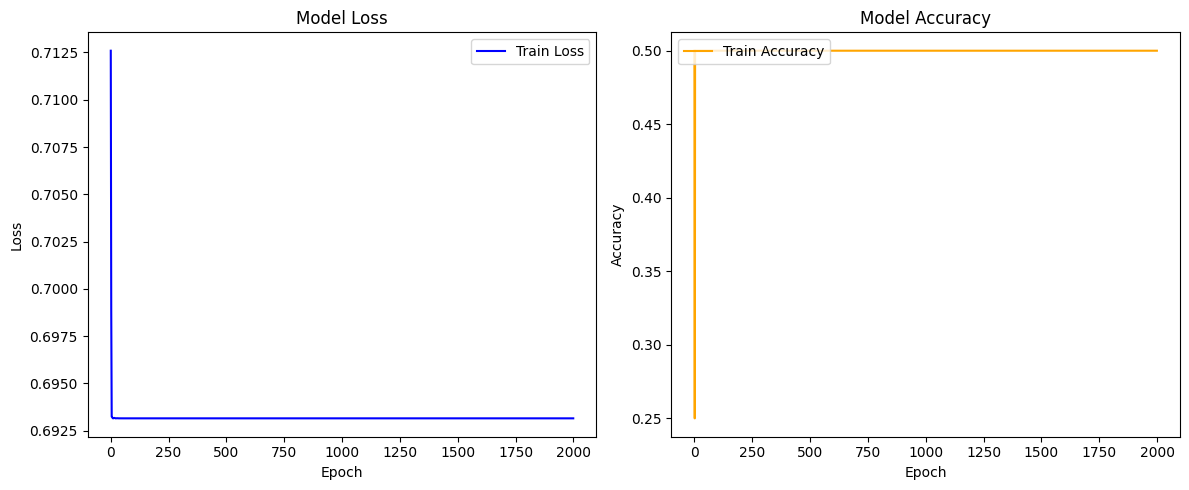

In [17]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='orange')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Binary cross-entropy is suitable because:


It is particularly useful for binary classification tasks like sentiment analysis, where we want to classify inputs into one of two categories (positive or negative).

It measures the performance of a classification model whose output is a probability value between 0 and 1.

Justification of Activation Functions:

ReLU (Rectified Linear Unit):

ReLU activation is used in hidden layers because it helps with the vanishing gradient problem.

It also gives better convergence and faster training.

Sigmoid:

The sigmoid function is used in the output layer for binary classification, as it gives the output to a range between 0 and 1, making it suitable for predicting probabilities of binary outcomes.